# 历史数据整理

**此部分工作，是为《PM2.5预测》生成训练数据集，因为心知天气网站的气象数据是在实时更新的，所以为使数据不再变动，单独编写代码读取数据并存入硬盘，提供给预测代码**

### 数据来源

**采用心知天气网站的气象和大气污染物数据，通过Restful风格url获取数据。气象数据获取北京市历史24小时平均数据，大气污染物数据获取北京市历史24小时各个监测站观测数据**

In [142]:
import pandas as pd
from io import StringIO
from urllib import request
import json
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

**获取网站气象数据**

In [91]:
url_beijing_all = 'https://api.seniverse.com/v3/air/hourly_history.json?key=Sz6GmmiQ6SAjYTKbc&location=beijing&language=zh-Hans&scope=all'
url_beijing_weather = 'https://api.seniverse.com/v3/weather/hourly_history.json?key=Sz6GmmiQ6SAjYTKbc&location=beijing&language=zh-Hans&unit=c'

In [92]:
s_p = request.urlopen(url_beijing_all).read().decode('utf8')#从网上把数据读成json字符串
s_w = request.urlopen(url_beijing_weather).read().decode('utf8')
data_dict_p = json.loads(s_p)#把json字符串转换成dict
data_dict_w = json.loads(s_w)

In [93]:
#将数据转换成pandas的DataFrame
def gen_dataframe(data_list):
    hour_list = []
    for dict_1 in data_list:
        dict_station = {}
        for station in dict_1['stations']: #字典的列表
            dict_station[station['station']] = station #{站名：信息} 组成字典
        dict_hour = pd.DataFrame(dict_station)
        hour_list.append(dict_hour.T)
    data = pd.concat(hour_list)
    return data

**先整理大气污染物数据**

In [94]:
data_list_p = data_dict_p['results'][0]['hourly_history']
data_p = gen_dataframe(data_list_p)

In [95]:
data_p.shape

(288, 9)

**处理时间格式**

In [96]:
def adjust_time(data):
    time = data['last_update'].astype(str)
    time = time.str[:19]
    time = time.str.replace('T', ' ')
    time = time.map(lambda x : parse(x))
    time = time.dt.strftime('%H-%m/%d')
    data['last_update'] = time
    return data

**生成大气污染物的DataFrame**

In [97]:
data_p = adjust_time(data_p)

In [98]:
data_p

,aqi,co,last_update,no2,o3,pm10,pm25,so2,station
万寿西宫,49,0.7,21-08/08,29,111,49,31,3,万寿西宫
定陵,51,0.7,21-08/08,11,108,52,33,3,定陵
东四,52,0.8,21-08/08,19,124,53,30,3,东四
天坛,48,0.6,21-08/08,20,88,46,33,3,天坛
农展馆,55,0.7,21-08/08,23,118,59,32,3,农展馆
官园,51,0.6,21-08/08,17,133,52,32,3,官园
海淀区万柳,52,0.6,21-08/08,21,114,53,31,3,海淀区万柳
顺义新城,62,0.7,21-08/08,26,129,64,44,3,顺义新城
怀柔镇,60,0.6,21-08/08,22,136,70,41,3,怀柔镇
昌平镇,53,0.6,21-08/08,20,133,55,27,1,昌平镇


In [99]:
def gen_table_w(list1):
    data_dict = {}
    for i, value in enumerate(list1):
        data_dict[i] = value
    return data_dict

**处理气象数据，生成DataFrame表格**

In [100]:
data_list_w = data_dict_w['results'][0]['hourly_history']
data_dict_w = gen_table_w(data_list_w)
data_w = pd.DataFrame(data_dict_w).T
data_w = adjust_time(data_w)

In [101]:
data_w

,clouds,code,dew_point,feels_like,humidity,last_update,pressure,temperature,text,visibility,wind_direction,wind_direction_degree,wind_scale,wind_speed
0,90,9,,29,71,21-08/08,1002,29,阴,12.1,南,183,2,9.0
1,50,4,,29,68,20-08/08,1002,30,多云,12.1,南,183,2,8.64
2,90,9,,30,64,19-08/08,1001,30,阴,13.1,南,188,2,9.72
3,50,4,,30,62,18-08/08,1001,31,多云,12.2,南,177,2,10.08
4,50,4,,31,60,17-08/08,1001,32,多云,12.9,西南,222,3,13.32
5,50,4,,31,58,16-08/08,1001,32,多云,12.8,西南,219,3,16.2
6,50,4,,32,58,15-08/08,1001,32,多云,11.2,东南,129,2,10.08
7,0,0,,31,57,14-08/08,1002,32,晴,10.2,西南,217,3,12.96
8,50,4,,31,59,13-08/08,1002,31,多云,6.4,东,79,2,6.48
9,50,4,,31,59,12-08/08,1003,31,多云,6.1,南,177,2,7.92


In [102]:
data_all = pd.merge(data_p, data_w, on = 'last_update')

In [103]:
data_all.shape

(288, 22)

In [104]:
pd.set_option('max_columns', 27)
data_all = data_all.drop(['dew_point', 'wind_direction', 'wind_direction_degree', 'text', 'code', 'wind_scale'], axis = 1)

In [126]:
data_all['wind_speed'] = data_all['wind_speed'].astype(float)
data_all['pm25'] = data_all['pm25'].astype(int)
data_all['no2'] = data_all['no2'].astype(int)
data_all['co'] = data_all['co'].astype(int)
data_all['o3'] = data_all['o3'].astype(int)
data_all['pm10'] = data_all['pm10'].astype(int)
data_all['so2'] = data_all['so2'].astype(int)
data_all['clouds'] = data_all['clouds'].astype(int)
data_all['feels_like'] = data_all['feels_like'].astype(int)
data_all['humidity'] = data_all['humidity'].astype(int)
data_all['pressure'] = data_all['pressure'].astype(int)
data_all['temperature'] = data_all['temperature'].astype(int)
data_all['visibility'] = data_all['visibility'].astype(float)

In [158]:
data_all['co'] = data_all['co'].astype(float)

**由于网站数据是在实时更新的，所以如果再次运行程序，训练数据集就被更新了，所以先把已经获得的数据作为历史数据存储起来**

In [159]:
data_all.to_excel('D:/python/practise/sample/weather/data_all.xlsx')

In [160]:
dd = data_all.set_index(['station', 'last_update']).swaplevel('station', 'last_update')

In [170]:
dd

aqi   co  no2   o3  pm10  pm25  so2  clouds  feels_like  \
last_update station                                                            
21-08/08    万寿西宫      49  0.7   29  111    49    31    3      90          29   
            定陵        51  0.7   11  108    52    33    3      90          29   
            东四        52  0.8   19  124    53    30    3      90          29   
            天坛        48  0.6   20   88    46    33    3      90          29   
            农展馆       55  0.7   23  118    59    32    3      90          29   
            官园        51  0.6   17  133    52    32    3      90          29   
            海淀区万柳     52  0.6   21  114    53    31    3      90          29   
            顺义新城      62  0.7   26  129    64    44    3      90          29   
            怀柔镇       60  0.6   22  136    70    41    3      90          29   
            昌平镇       53  0.6   20  133    55    27    1      90          29   
            奥体中心      49  0.7   14  123    49    31    1      90          29   
            古城        72  0.6   43   87    93    37    3      90          29   
20-08/08    万寿西宫      46  0.6   23  117    46    30    1      50          29   
            定陵        57  0.8   13  152    64    21    3      50          29   
            东四        52  0.7   20  148    54    30    3      50          29   
            天坛        51  0.6   18  115    51    34    3      50          29   
            农展馆       46  0.7   19  146    24    32    3      50          29   
            官园        47  0.6   16  148    47    29    3      50          29   
            海淀区万柳     53  0.6   19  128    55    32    3      50          29   
            顺义新城      54  0.7   24  150    58    37    3      50          29   
            怀柔镇       57  0.6   19  162    64    36    3      50          29   
            昌平镇       48  0.6   19  152    47    31    1      50          29   
            奥体中心      52  0.7   19  139    54    34    1      50          29   
            古城        59  0.6   24  114    68    29    3      50          29   
19-08/08    万寿西宫      48  0.6   24  144    48    29    1      90          30   
            定陵       122  0.7   21  243     7     0    2      90          30   
            东四        74  0.7   18  179    62    32    3      90          30   
            天坛        55  0.6   15  154    53    39    1      90          30   
            农展馆       70  0.7   16  176    50    33    3      90          30   
            官园        54  0.6   17  163    46    27    3      90          30   
...                  ...  ...  ...  ...   ...   ...  ...     ...         ...   
00-08/08    海淀区万柳     28  0.6   23   88    24    16    3      50          25   
            顺义新城       0  0.0    0    0     0     0    0      50          25   
            怀柔镇       22  0.4    8   54    22    14    3      50          25   
            昌平镇       31  0.5   31   45    31    17    3      50          25   
            奥体中心       0  0.0    0    0     0     0    0      50          25   
            古城        36  0.5   33   87    36    19    3      50          25   
23-08/07    万寿西宫       0  0.0    0    0     0     0    0      50          26   
            定陵         0  0.0    0    0     0     0    0      50          26   
            东四         0  0.0    0    0     0     0    0      50          26   
            天坛        36  0.7   18   97    29    25    3      50          26   
            农展馆       37  0.6   11  116    18    18    2      50          26   
            官园        39  0.6   16  124    23    18    3      50          26   
            海淀区万柳     39  0.6   22  104    39    16    3      50          26   
            顺义新城       0  0.0    0    0     0     0    0      50          26   
            怀柔镇       24  0.4    5   67    24    16    3      50          26   
            昌平镇        0  0.0    0    0     0     0    0      50          26   
            奥体中心       0  0.0    0    0     0     0    0      50          26   
            古城       

**热力图**

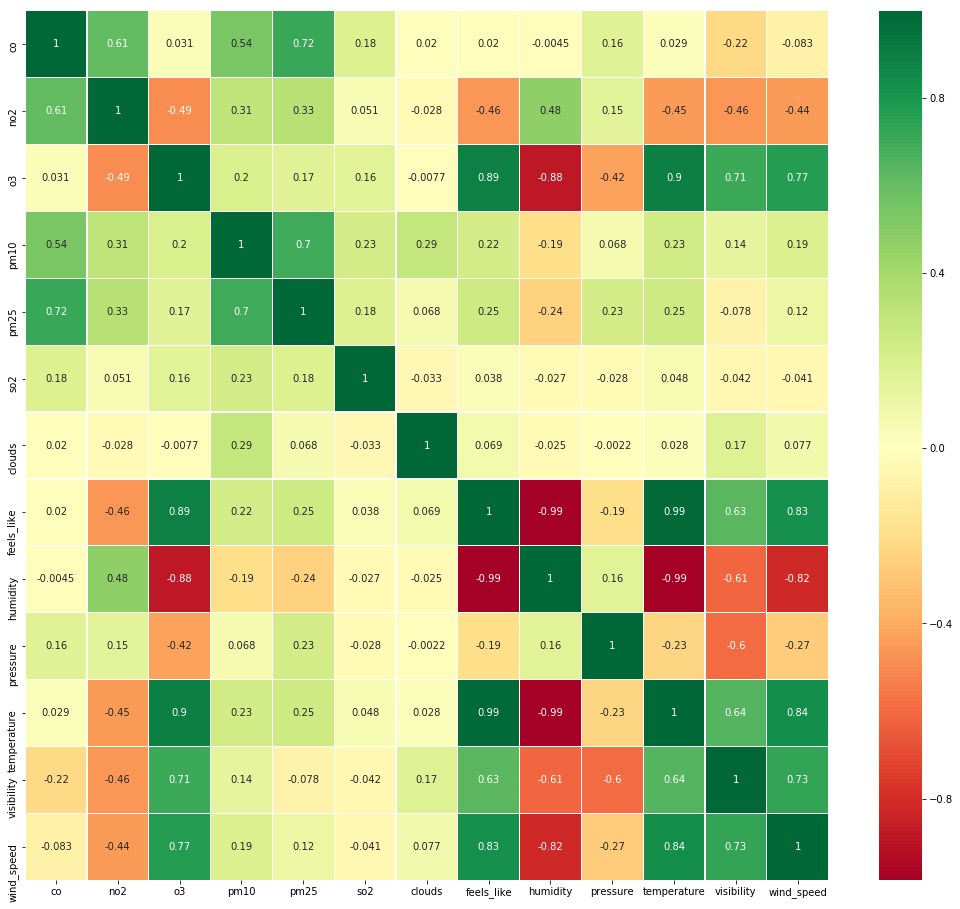

In [162]:
plt.figure(figsize = (18,16))
sns.heatmap(dd.corr(), annot = True, cmap='RdYlGn',linewidths=0.2)

**由图可见，相关性尚可**

### 由于刚获取的数据，网站数据还没有太多更新数据，所以先用实时数据做个预测

In [163]:
#生成训练数据集
y_train = dd['pm25'].values
x_train = dd.drop('pm25', axis = 1).values

In [164]:
model = LinearRegression()

In [165]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [168]:
model.score(x_train, y_train)

0.7515017912831037

### 从心知天气网继续获取实时数据，此时的数据更新了一个小时的新数据

In [180]:
url_beijing_now_p = 'https://api.seniverse.com/v3/air/now.json?key=Sz6GmmiQ6SAjYTKbc&location=beijing&language=zh-Hans&scope=city'
url_beijing_now_w = 'https://api.seniverse.com/v3/weather/now.json?key=Sz6GmmiQ6SAjYTKbc&location=beijing&language=zh-Hans&unit=c'

In [181]:
now_p = request.urlopen(url_beijing_now_p).read().decode('utf8')
now_dict_p = json.loads(now_p)
now_w = request.urlopen(url_beijing_now_w).read().decode('utf8')
now_dict_w = json.loads(now_w)

In [188]:
a = now_dict_p['results'][0]['air']['city']

In [189]:
b = now_dict_w['results'][0]['now']

In [197]:
a = pd.Series(a)
b = pd.Series(b)
c = pd.concat([a,b])
true_pm25 = c['pm25']

In [205]:
x_test = c.reindex(dd.columns).drop(['pm25']).values

In [222]:
x_test = x_test.reshape(13,1).astype(float)

**仅一组数据，模型无法预测，所以采用手动计算预测值**

In [223]:
theta = model.coef_
theta = theta.reshape(1,13)

In [225]:
theta.dot(x_test) + model.intercept_

array([[32.45001456]])

In [226]:
true_pm25

'42'

### 可以看到，PM2.5真实值是42，预测值是32，接下来等明天更新更多数据再生成测试数据集